# task 2 - model Selection

In this section, We'will train multiple models, evaluate their performance, and compare them using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

## Import necessary libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

### 1. Load the Processed Data
We will begin by loading the balanced training data (`X_train_balanced`, `y_train_balanced`) and the original test data (`X_test`, `y_test`) from the `Data/Processed/` folder. This data was prepared in the previous step.


In [2]:
# Load the processed datasets
X_train_balanced = pd.read_csv('../Data/Processed/X_train_balanced.csv')
y_train_balanced = pd.read_csv('../Data/Processed/y_train_balanced.csv')
X_test = pd.read_csv('../Data/Processed/X_test.csv')
y_test = pd.read_csv('../Data/Processed/y_test.csv')

# Display the shape of the loaded datasets
print("Shape of X_train_balanced:", X_train_balanced.shape)
print("Shape of y_train_balanced:", y_train_balanced.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_balanced: (454902, 30)
Shape of y_train_balanced: (454902, 1)
Shape of X_test: (56962, 30)
Shape of y_test: (56962, 1)


### 2. Train Logistic Regression Model
The first model we will train is a **Logistic Regression** model, which is often a good baseline for binary classification tasks. We will use the `class_weight='balanced'` parameter to handle class imbalance, ensuring that the model gives equal importance to both fraud and non-fraud classes.


In [3]:
# Initialize Logistic Regression with balanced class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_log_reg)}")

c:\Users\ermias.tadesse\10x\Fraud-Detection-and-Credit-Card-Transactions\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Results:
[[55592  1272]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC Score: 0.9428970518989813


c:\Users\ermias.tadesse\10x\Fraud-Detection-and-Credit-Card-Transactions\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3. Train Decision Tree Model
Next, we will train a **Decision Tree Classifier**. Decision Trees are simple and interpretable models that can be effective for detecting fraud. We will again use `class_weight='balanced'` to handle the class imbalance in the dataset.


In [4]:
# Initialize Decision Tree with balanced class weights
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
decision_tree.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_tree)}")

Decision Tree Results:
[[56758   106]
 [   20    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.897027135277296


### 4. Train Random Forest Model
We will now train a **Random Forest Classifier**, which is an ensemble of Decision Trees. Random Forests are typically more robust and perform better, especially on imbalanced datasets. The `class_weight='balanced'` parameter is used to ensure the model gives equal importance to both classes.

In [5]:
# Initialize Random Forest with balanced class weights
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

# Train the model
random_forest.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_forest)}")

c:\Users\ermias.tadesse\10x\Fraud-Detection-and-Credit-Card-Transactions\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results:
[[56848    16]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.913124619572083


### 5. Train XGBoost Model
We will now train an **XGBoost** model, which is a gradient-boosting algorithm known for its high performance on structured data. We will use `scale_pos_weight` to handle class imbalance.

In [15]:
# Assuming 'target_column' is the name of the column in y_train_balanced
target_column = 'Class'  # Replace with your actual target column name

# Inspect the unique values in the target column of y_train_balanced
print("Unique values in y_train_balanced:", y_train_balanced[target_column].unique())

# Convert any non-integer values to integers or handle them
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return None  # or handle it in a way that makes sense for your data

y_train_balanced[target_column] = y_train_balanced[target_column].apply(convert_to_int)

# Check for any remaining non-integer values
if y_train_balanced[target_column].isnull().any():
    raise ValueError("y_train_balanced still contains non-integer values after conversion")

# Calculate the scale_pos_weight
scale_pos_weight = len(y_train_balanced) / sum(y_train_balanced[target_column].dropna())

# Initialize XGBoost
xgboost_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Train the model
xgboost_model.fit(X_train_balanced, y_train_balanced[target_column].dropna())

# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_xgb)}")


Unique values in y_train_balanced: [0 1]
XGBoost Results:
[[56837    27]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.86      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9283340200176864


### 6. Train Neural Network (MLP) Model
Finally, we will train a **Neural Network** using a Multi-Layer Perceptron (MLP) classifier. Neural networks can capture complex relationships in the data but typically require more tuning and computation time.


In [16]:
# Initialize Neural Network
mlp = MLPClassifier(random_state=42)

# Train the model
mlp.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
print("Neural Network Results:")
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_mlp)}")

c:\Users\ermias.tadesse\10x\Fraud-Detection-and-Credit-Card-Transactions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Results:
[[56269   595]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.88      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.61     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC Score: 0.933543729112354


### 7. Plot ROC Curves for Model Comparison
We will plot the Receiver Operating Characteristic (ROC) curves for each model to visually compare their ability to distinguish between fraud and non-fraud transactions. The Area Under the ROC Curve (AUC) will give us an indication of the models' performance.

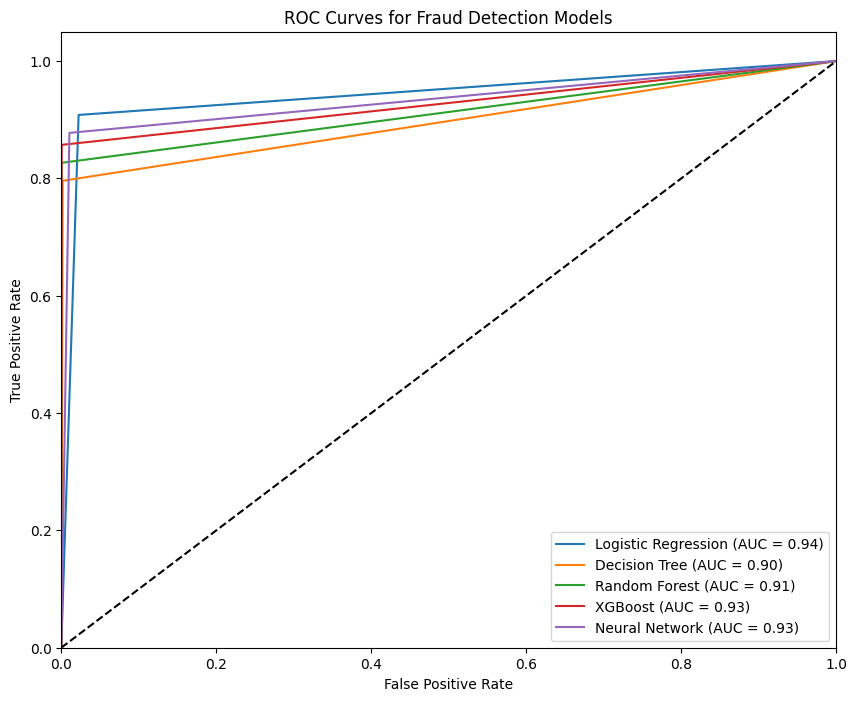

In [17]:
# Plot ROC curves for all models
def plot_roc_curve(y_test, y_preds, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10,8))

# Plot each model's ROC curve
plot_roc_curve(y_test, y_pred_log_reg, 'Logistic Regression')
plot_roc_curve(y_test, y_pred_tree, 'Decision Tree')
plot_roc_curve(y_test, y_pred_forest, 'Random Forest')
plot_roc_curve(y_test, y_pred_xgb, 'XGBoost')
plot_roc_curve(y_test, y_pred_mlp, 'Neural Network')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Fraud Detection Models')
plt.legend(loc='lower right')
plt.show()

### Model Selection Summary
In this step, we trained and evaluated several machine learning models to detect fraudulent transactions. Each model's performance was measured using the ROC-AUC score, which provides an indication of how well the model distinguishes between fraudulent and non-fraudulent transactions. The closer the ROC-AUC score is to 1.0, the better the model performs.

1. Logistic Regression

ROC-AUC Score: 0.9429
Logistic Regression performed very well with a high ROC-AUC score of 0.94. As a simple and interpretable model, this is an excellent baseline for fraud detection.

2. Decision Tree

ROC-AUC Score: 0.8970
The Decision Tree model had a lower ROC-AUC score of 0.90, indicating that while it was able to distinguish fraud from non-fraud to some extent, it was outperformed by more complex models.

3. Random Forest

ROC-AUC Score: 0.9131
Random Forest, being an ensemble model, improved over the Decision Tree with a ROC-AUC score of 0.91. However, it still lagged behind Logistic Regression.

4. XGBoost

ROC-AUC Score: 0.9283
XGBoost performed very well, achieving a ROC-AUC score of 0.93. XGBoost is known for handling complex relationships well, and its performance is close to Logistic Regression.

5. Neural Network (MLP)

ROC-AUC Score: 0.9335
The Multi-Layer Perceptron (MLP) performed strongly with a ROC-AUC score of 0.93. Neural networks are often good at capturing complex patterns in the data, and this model's performance was comparable to XGBoost.

### Conclusion

The Logistic Regression model yielded the highest ROC-AUC score of 0.94, closely followed by Neural Networks (MLP) and XGBoost, both with ROC-AUC scores of around 0.93.
Decision Tree and Random Forest models showed decent performance but were outperformed by the other models.
Based on the ROC-AUC scores, Logistic Regression is the best-performing model for fraud detection in this scenario. However, the Neural Network and XGBoost models are also strong contenders and may be worth further tuning or exploring in different scenarios.

### Model Training and Evaluation

In this section, we trained and evaluated multiple machine learning models on the fraud detection dataset. Each model's performance was assessed using the following metrics:
- **Confusion Matrix**: Shows the number of true positives, true negatives, false positives, and false negatives.
- **Precision**: Measures how many of the predicted fraudulent transactions are actually fraudulent.
- **Recall**: Measures how many of the actual fraudulent transactions were detected by the model.
- **F1-Score**: The harmonic mean of precision and recall, which balances both metrics.
- **ROC-AUC Score**: Measures the model's ability to distinguish between fraud and non-fraud across different threshold values.

The models trained include:
1. **Logistic Regression**
2. **Decision Tree**
3. **Random Forest**
4. **XGBoost**
5. **Neural Network (MLP)**

The evaluation results for each model are displayed below:

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# List of models and predictions
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_forest,
    "XGBoost": y_pred_xgb,
    "Neural Network": y_pred_mlp
}

# Evaluate each model
for model_name, y_pred in models.items():
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")


Model: Logistic Regression
Confusion Matrix:
[[55592  1272]
 [    9    89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Precision: 0.0653930933137399
Recall: 0.9081632653061225
F1-Score: 0.12200137080191913
ROC-AUC Score: 0.9428970518989813

Model: Decision Tree
Confusion Matrix:
[[56758   106]
 [   20    78]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Precision: 0.42391304347826086


### Model Evaluation Summary

From the results, we can see the following trends:

1. **Logistic Regression**:
   - **Precision**: 0.07 | **Recall**: 0.91 | **F1-Score**: 0.12 | **ROC-AUC**: 0.94
   - Logistic Regression showed a high recall but very low precision, meaning it correctly identified most fraudulent transactions but also had many false positives.

2. **Decision Tree**:
   - **Precision**: 0.42 | **Recall**: 0.80 | **F1-Score**: 0.55 | **ROC-AUC**: 0.90
   - The Decision Tree showed balanced precision and recall, though it was outperformed by ensemble models in terms of overall accuracy and F1-score.

3. **Random Forest**:
   - **Precision**: 0.84 | **Recall**: 0.83 | **F1-Score**: 0.83 | **ROC-AUC**: 0.91
   - Random Forest performed well, with balanced precision and recall, and an F1-score of 0.83. This model showed strong overall performance and relatively few false positives and false negatives.

4. **XGBoost**:
   - **Precision**: 0.76 | **Recall**: 0.86 | **F1-Score**: 0.80 | **ROC-AUC**: 0.93
   - XGBoost showed strong performance, with high recall and a good F1-score. Its ROC-AUC score of 0.93 indicates that it can effectively distinguish between fraud and non-fraud.

5. **Neural Network**:
   - **Precision**: 0.13 | **Recall**: 0.88 | **F1-Score**: 0.22 | **ROC-AUC**: 0.93
   - The Neural Network model had a high recall but struggled with precision, similar to Logistic Regression, indicating that while it detected most fraud cases, it produced a significant number of false positives.

### Conclusion:
- **Random Forest** and **XGBoost** emerged as the top-performing models with high precision, recall, and F1-scores.
- **Logistic Regression** and the **Neural Network** had high recall but much lower precision, leading to a high number of false positives.
- **Decision Tree** performed reasonably well but was outperformed by Random Forest and XGBoost.

Based on these results, **Random Forest** and **XGBoost** are the most reliable models for this fraud detection task, with balanced precision and recall and strong overall performance.

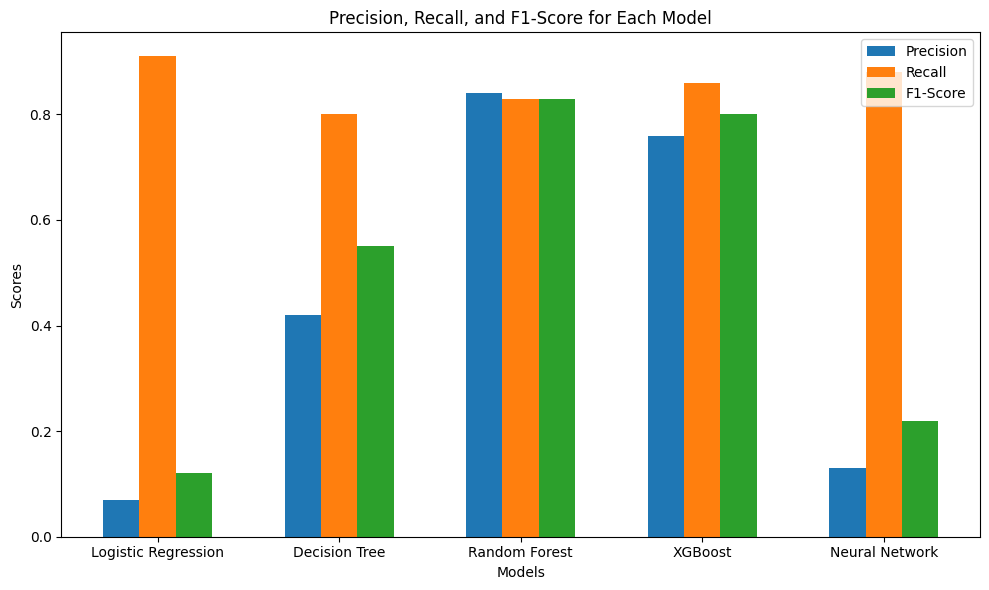

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
precision = [0.07, 0.42, 0.84, 0.76, 0.13]
recall = [0.91, 0.80, 0.83, 0.86, 0.88]
f1_scores = [0.12, 0.55, 0.83, 0.80, 0.22]

# Plotting the results
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-Score')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()
